<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import math
import pandas as pd
df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&apiKey={API_KEY}"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,The A.V. Club,Scott Huver,Step into the ring: The best bouts in movie hi...,"Whether it's boxing, wrestling, MMA, karate, o...",https://www.avclub.com/sports-movie-fight-scen...,https://i.kinja-img.com/gawker-media/image/upl...,2023-03-03T15:00:00Z,Is there anything in film quite as dramatic as...
1,Boing Boing,Jennifer Sandlin,A compilation of training montages from iconic...,Jeremy Urquhart at Collider recently published...,https://boingboing.net/2023/03/03/a-compilatio...,https://i0.wp.com/boingboing.net/wp-content/up...,2023-03-03T14:21:42Z,Jeremy Urquhart at Collider recently published...
2,The Guardian,Leila Latif,Agent Elvis review – Matthew McConaughey’s fou...,"This animation, co-created by Priscilla Presle...",https://www.theguardian.com/tv-and-radio/2023/...,https://i.guim.co.uk/img/media/9bbd93b4a70104d...,2023-03-17T06:00:34Z,In some ways its surprising that the show Agen...
3,Espinof.com,Jorge Loser,"""El Miyagiverso aún no ha acabado"". El creador...","El creador de 'Cobra Kai', Jon Hurwitz, ha acl...",https://www.espinof.com/series-de-ficcion/miya...,https://i.blogs.es/9c7309/cobra-kai-season-6-a...,2023-03-20T15:00:36Z,"El creador de 'Cobra Kai', Jon Hurwitz, ha acl..."
4,Buzzfeed,Allie Hayes,You Won't Believe All Of The Awesome TV Shows ...,TV shows! Movies! A nearly unhinged amount of ...,https://www.buzzfeed.com/alliehayes/new-on-net...,https://img.buzzfeed.com/buzzfeed-static/stati...,2023-02-22T18:20:07Z,March 1\r\nBig Daddy\r\nBurlesque\r\nCheat NET...
...,...,...,...,...,...,...,...,...
425,Tecmundo.com.br,Renato Cavallera,Takashi Nishiyama - Um dos maiores da história...,Vou te fazer um desafio. Leia este texto e ten...,https://www.tecmundo.com.br/voxel/261021-takas...,https://tm.ibxk.com.br/2023/01/18/181910015595...,2023-02-25T20:00:00Z,Vou te fazer um desafio. Leia este texto e ten...
426,Starcommunity.com.au,Jin Hui,Masses of joy at Nawroz,The famous Nawroz Festival saw a huge turn-out...,https://berwicknews.starcommunity.com.au/enter...,https://berwicknews.starcommunity.com.au/files...,2023-03-21T06:00:10Z,By Sahar Foladi\r\nThe famous Nawroz Festival ...
427,Khabarhub.com,Khabarhub,Sisne Rural Municipality wins 14th President R...,RUKUM: Sisne Rural Municipality stood first wi...,https://english.khabarhub.com/2023/01/295128/,https://english.khabarhub.com/wp-content/uploa...,2023-03-01T15:15:44Z,Image for Representation.RUKUM: Sisne Rural Mu...
428,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,2023-02-23T17:39:45Z,"Det är Kompisföreningen Öst, en del av Fritids..."


In [8]:
from datetime import date, timedelta

today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey=API_KEY"

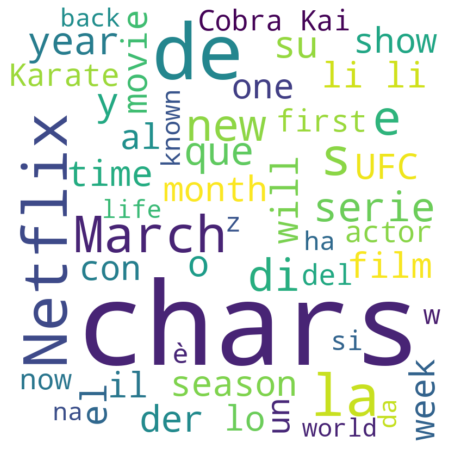

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df['content'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=None, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

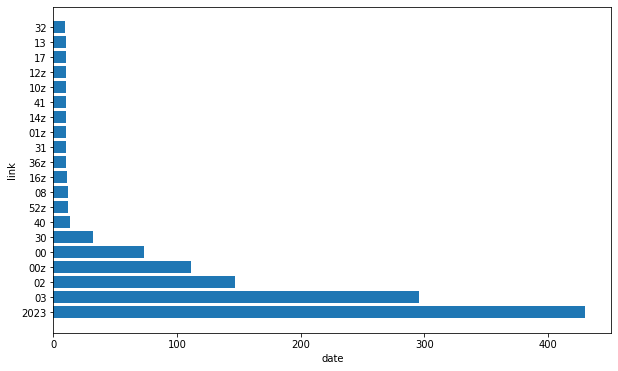

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

publishedAt = (df['publishedAt'])

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed text data
vectorizer.fit_transform(publishedAt)

# Get the list of unique words in the text data
words = vectorizer.get_feature_names_out()

# Calculate the frequency of each word in the text data
word_freq = vectorizer.transform(publishedAt).toarray().sum(axis=0)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(words[np.argsort(word_freq)[-20:]], np.sort(word_freq)[-20:])
ax.set_xlabel('date')
ax.set_ylabel('link')
ax.invert_yaxis()
plt.show()